In [1]:
using Distributions
using PyPlot 

## Questions
1. Compute the average service time from the queues you made. Is the result logical ?

2. Compute the average waiting time from the queues you made.

3. Draw the number of customers VS the waiting time.

4. When will the system close -In other words what is the completion time of the last customer-?

5. What is the server utilization?

6. Reverse the lamda and μ values and answer question 2 again. What is your comment?

In [2]:
type customer
    arrivalTime::Float64
    serviceTime::Float64
    waitTime::Float64
    ID::Int
end

In [3]:
function mm1(λ,μ,customers)
    interArrival_dist=Exponential(1/λ)
    processing_dist= Exponential(1/μ)
    arrivalQueue= Array(customer,0)
    serviceQueue= Array(customer,0)
    t=0
    for i=1:customers 
        arrive=rand(interArrival_dist)
        service=rand(processing_dist)   
        t+=arrive
        cust=customer(t,service,Inf,i) 
        push!(arrivalQueue, cust)
    
    end
    t= arrivalQueue[1].arrivalTime
    while !isempty(arrivalQueue)
        nextCust= shift!(arrivalQueue)
        t= max(t, nextCust.arrivalTime)
        nextCust.waitTime = t- nextCust.arrivalTime
        t+=nextCust.serviceTime
        push!(serviceQueue, nextCust)
    
    end

   serviceQueue
end

mm1 (generic function with 1 method)

In [4]:
λ=2
μ=3
serviceQ= mm1(λ,μ,10000);

In [5]:
#1. Compute the average service time from the queues you made. Is the result logic ?
serviceT = zeros(Float64,length(serviceQ))
for i = 1:  length(serviceQ)
    serviceT[i] = serviceQ[i].serviceTime
end
mean(serviceT)

0.3346038336982349

In [6]:
#2. Compute the average waiting time from the queues you made.

waitTimes=Array(Float64,0)
for c in serviceQ
    push!(waitTimes ,c.waitTime)
end
mean(waitTimes)

0.6865420566042699

In [7]:
# Mathematically 
#avgWaitingTime = 1/(μ − λ) − 1/μ
avgWaitingTime = (1/(3-2)) - (1/3)

0.6666666666666667

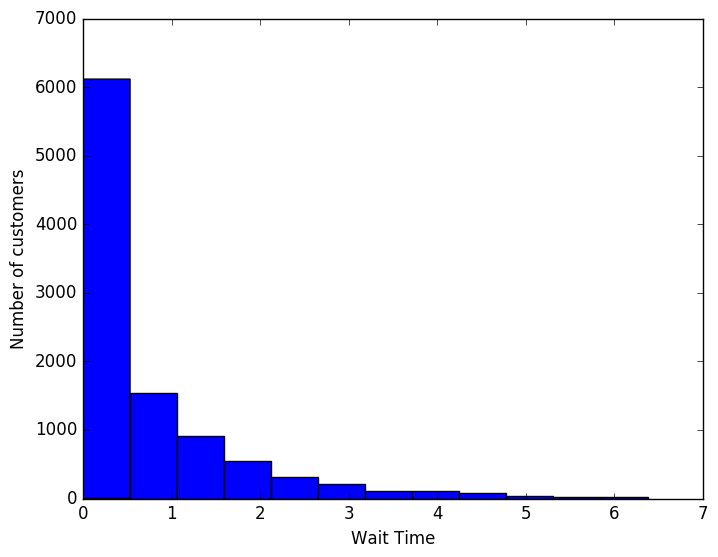

In [8]:
#3. Draw the number of customers VS the waiting time.
ax= axes()
ax[:hist](waitTimes,12);
ylabel("Number of customers"); xlabel("Wait Time");

In [9]:
# 4. When will the system close-in other words what is the completion time of the last customer-?

closingTime=serviceQ[end].arrivalTime + serviceQ[end].serviceTime + serviceQ[end].waitTime

5035.7028258615965

In [10]:
# 5. What is the server utilization?
# Utilization is the percentage of time that the server was busy from the total time
# represents the average proportion of time which the server is occupied
serverUtilization = sum(serviceT)/closingTime 

0.6644630258557502

In [11]:
#Mathematically it equals = λ/c.μ, where c is the number of servers
#Ρ = λ/ (c. μ) 
Ρ = 2/(1*3)

0.6666666666666666

In [12]:
# 6. Reverse the λ and μ values and answer question 2 and 5 again. What is your comment?
λ2=3
μ2=2
serviceQ= mm1(λ2,μ2,10000);

In [13]:
waitTimes=Array(Float64,0)
for c in serviceQ
    push!(waitTimes ,c.waitTime)
end
mean(waitTimes)

#A system block will happpen given that λ > μ (2)

844.5098988260779

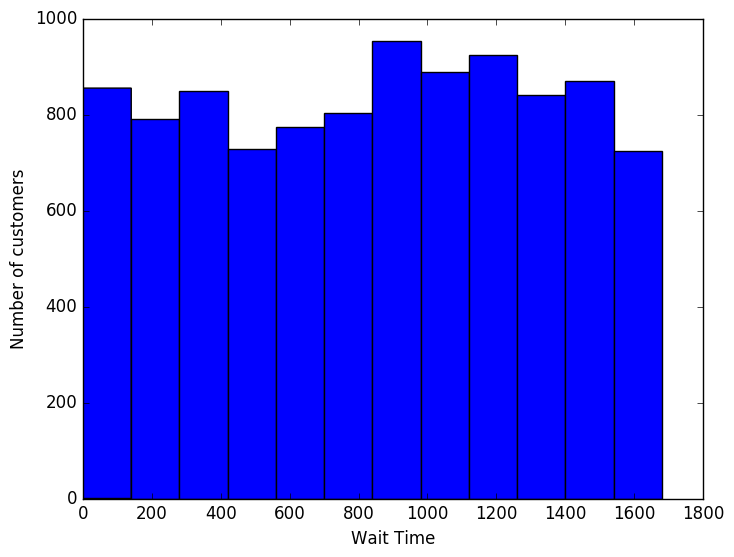

In [14]:
ax= axes()
ax[:hist](waitTimes,12);
ylabel("Number of customers"); xlabel("Wait Time");